----

### <span style="color:#0b486b">SIT744 Practical Machine Learning for Data Science</span>


---


# <span style="color:#0b486b">Assignment Two: Deep Neural Networks, Representation Learning, and Text Analytics</span>
### Due: <span style="color:red">24:00pm 24 September 2019</span>  (Tuesday)

#### <span style="color:red">Important note:</span> This is an **individual** assignment. It contributes **40%** to your final mark. Read the assignment instruction carefully.

This notebook has been prepared for your to complete Assignment 2. The theme of this assignment is about practical machine learning knowledge and skills in deep neural networks, word embedding and text analytics. Some sections have been partially completed to help you get
started. **The total marks for this notebook are 80 marks, which will be re-scaled to 40 marks in the grade.**.

* Before you start, read the entire notebook carefully once to understand what you need to do. <br><br>

* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL**, there will be places where you **must** supply your own codes when instructed. <br>

## <span style="color:#0b486b">Instruction</span>

This assignment contains **two** parts 

* Part 1: Deep Feedforward Neural Network **[45 points]**
* Part 2: Word2Vec, text analytics and application **[35 points]**

**Hint**: This assignment was essentially designed based on the lectures and practical lab sessions covered from Week 5 to 9. You are strongly recommended to go through these contents thoroughly which might help you to complete this assignment.

## <span style="color:#0b486b">What to submit</span>

This assignment is to be completed individually and submitted to CloudDeakin. **By the due date, you are required to submit the following files to the corresponding Assignment in CloudDeakin**:

1.	<span style="color:red">**[YourID]_assignment2_solution.ipynp**</span>:  **this is your Python notebook solution source file**.
1.	<span style="color:red">**[YourID]_assingment2_output.html**</span>: **this is the output of your Python notebook solution *exported* in html format**.
1.	<span style="color:red">Any extra files needed to complete your assignment</span> (e.g., images used in your answers).

For example, if your student ID is: 123456, you will then need to submit the following files:
* 123456_assignment2_solution.ipynp
* 123456_assignment2_output.html
* any extra files or subfolder you might have (this can be named according to your preference).

<span style="color:red">Please proceed to the content below to complete your assignment!</span>

## <span style="color:#0b486b">Part 1: Deep Feedforward Neural Network </span>
<div style="text-align: right"><span style="color:red">**[Total mark for this part: 45 points]**<span></div>

The first part of this assignment is for you to demonstrate the knowledge in deep learning that you have acquired from the lectures and practical lab materials. Most of the contents in this assignment are drawn from the practical materials in week 5, 6 and 7 for deep neural networks. Going through these materials before attempting this assignment is highly recommended.

*Run the following cell to create necessary subfolders for this assignment. You must **not** modify these codes and **must** run it first*.

In [1]:
# Create necessary subfolders to store immediate files for this assignment.

import os
if not os.path.exists("./models/dnn0"):
    os.makedirs("models/dnn0")

The first part of this assignment is to apply DNN to recognize letters from A-Z. You have played with MNIST dataset in your pracs and this should have given a good sense of how to apply DNN on images for recognition task. 

In this assignment, you are going to work with the **notMNIST** dataset for *letter recognition task*. The dataset contains 10 classes of letters A-J taken from different fonts. You will see some examples at the visualization task in the next part. A short blog about the data can be found [here](http://yaroslavvb.blogspot.com.au/2011/09/notmnist-dataset.html).

Here we only consider a small subset which can be found at [this link](http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat). This file has been already downloaded and stored in subfolder `datasets` of this assignment folder. The file is in *Matlab* format, thus our first task is to:

####  <span style="color:red">**Question 1.1**</span>. Load the data into *`numpy array`* format of two variables:
* *`x`*: storing features with dimension `[num_samples, width, height]` (`num_samples`: number of samples, `width`: image width, `height`: image height), and
* *`y`*: storing labels with dimension `num_samples`. 
<div style="text-align: right"><span style="color:red">**[3 points]**</span></div>

Enter the missing codes in the following cell to complete this question.

In [2]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

import numpy as np
import scipy.io as sio
data = sio.matlab.loadmat("datasets/notMNIST_small.mat")
x, y = data['images'], data['labels']
x = np.rollaxis(x, axis=2)

####  <span style="color:red">**Question 1.2**</span>. Print out the total number of data points, and the *unique* labels in this dataset.
<div style="text-align: right"><span style="color:red">**[3 points]**</span></div> 

In [3]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

print(f'Total number of data points: {len(x)}')
print(f'Unique labels: {set(y)}')

Total number of data points: 18724
Unique labels: {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0}


####  <span style="color:red">**Question 1.3**</span>. Display 100  images in the form of `10x10` matrix, each row showing 10 *random* images of a label. You might decide to use the function `display_images` provided at the beginning of this assignment, or you can write your own codes.
<div style="text-align: right"><span style="color:red">**[4 points]**</span></div> 

In [4]:
# this function is a utility to display images from the dataset
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display_images(images, shape):
    fig = plt.figure(figsize=shape)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(np.prod(shape)):
        p = fig.add_subplot(shape[0], shape[1], i+1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)                

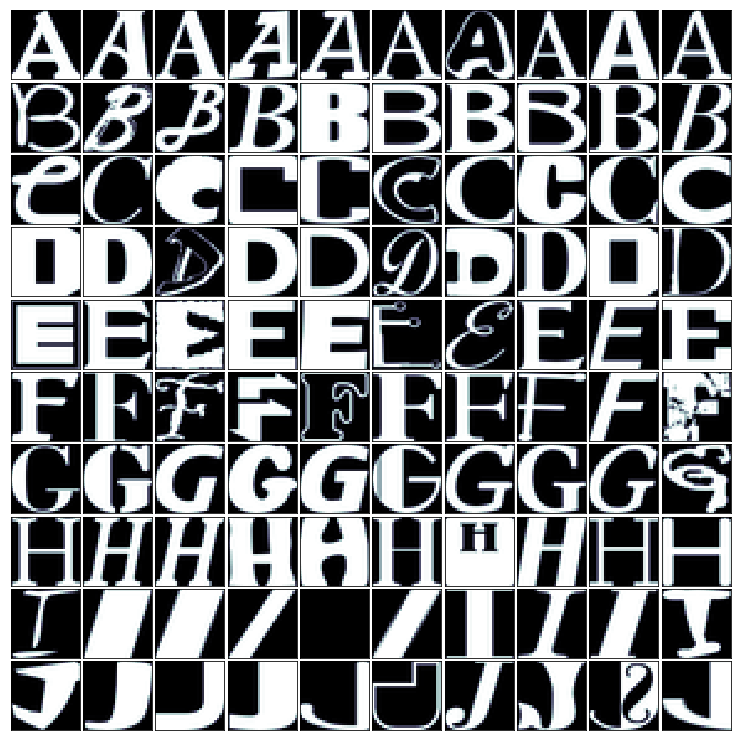

In [5]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

unique_labels = set(y)
images = []
for l in unique_labels:
    idx = np.where(y == l)[0]
    idx = idx[np.random.permutation(len(idx))[:10]]
    for i in idx:
        images += [x[i]]

display_images(images, shape=(10, 10))

####  <span style="color:red">**Question 1.4**</span>. Use the *deep feedforward neural network* as the classifier to perform images classification task in a *single split training and testing*.

The total marks for this question is <span style="color:red">**[35 points]**</span>, with the following detailed breakdown sub-questions:

<span style="color:red">**(a)**</span> **Write your code to reshape the variable `x` storing features from `[num_samples, width, height]` dimension to `[num_samples, num_features]` with `num_features = width x height`. ** (*Hint*: you might want to use the `reshape()' function)
<div style="text-align: right"> <span style="color:red">**[3 points]**</span> </div>

In [6]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
x = x.reshape(x.shape[0],-1)

In training the DNN, scaling data is important. The pixel intensities of images are in the range of [0, 255], which makes the neural network difficult to learn.

**Rescale the input data into the range of [0, 1]**
<div style="text-align: right"> 
<span style="color:red">**[2 points]**</span> </div>

In [7]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
x = (x - np.min(x))/np.ptp(x)

<span style="color:red">**(b)**</span> **Split the data into two subsets: 70% for training and 30% for testing. Note that you must use [*Stratified-Shuffle-Split*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) to make sure training and testing are balanced and randomly shuffled before learning the model.**
<div style="text-align: right"> <span style="color:red">**[5 points]**</span> </div>

In [8]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
train_index, test_index = list(sss.split(x, y))[0]
x_train, x_test = x[train_index], x[test_index]
y_train, y_test = y[train_index], y[test_index]

<span style="color:red">**(c)**</span> **Construct a deep feedforward neural network with the following architecture:**

* An input layer followed by *two* hidden layers, each with *500* hidden units, and an *output* layer;
* *ReLU* activations for neurons in each hidden layer;
* Training with gradient descent optimizer with learning rate **0.0011**, batch size 128 and 50 epochs.

(*Hint*: *this question heavily relies on the knowledge you've learned from lab session in week 5 and 6. You are encouraged to revise these materials for this question*)

<div style="text-align: right"> <span style="color:red">**[20 points]**</span> </div>

In [14]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL [5 marks]

import tensorflow as tf

tf.reset_default_graph()

num_inputs = 28 * 28
num_hidden1 = 500
num_hidden2 = 500
num_outputs = len(np.unique(y))

inputs = tf.placeholder(tf.float32, shape=[None, num_inputs], name="inputs")
labels = tf.placeholder(tf.int32, shape=[None], name="labels")

In [15]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL [3 marks]

def neuron_layer(x, num_neurons, name, activation=None):
    with tf.name_scope(name):
        num_inputs = int(x.shape[1])
        stddev = 2 / np.sqrt(num_inputs)
        init = tf.truncated_normal([num_inputs, num_neurons], stddev=stddev)
        W = tf.Variable(init, name="weights")
        b = tf.Variable(tf.zeros([num_neurons]), name="biases")
        z = tf.matmul(x, W) + b
    if activation == "sigmoid":
        return tf.nn.sigmoid(z)
    elif activation == "relu":
        return tf.nn.relu(z)
    else:
        return z

In [16]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL [7 marks]

with tf.name_scope("dnn"):
    hidden1 = neuron_layer(inputs, num_hidden1, "hidden1", activation="relu")
    hidden2 = neuron_layer(hidden1, num_hidden2, "hidden2", activation="relu")
    logits = neuron_layer(hidden2, num_outputs, "output")
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits, name='xentropy')
    loss = tf.reduce_mean(xentropy, name="loss")
    
with tf.name_scope("evaluation"):
    correct = tf.nn.in_top_k(logits, labels, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
with tf.name_scope("train"):
    learning_rate = 0.0011
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    grads = optimizer.compute_gradients(loss)
    training_op = optimizer.minimize(loss)
    
    for var in tf.trainable_variables():
        tf.summary.histogram(var.op.name + "/values", var)
        
    for grad, var in grads:
        if grad is not None:
            tf.summary.histogram(var.op.name + "/gradients", grad)

# summary
accuracy_summary = tf.summary.scalar('accuracy', accuracy)


In [17]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL [5 marks]

# merge all summary
tf.summary.histogram('hidden1/activations', hidden1)
tf.summary.histogram('hidden2/activations', hidden2)
merged = tf.summary.merge_all()

init = tf.global_variables_initializer()
saver = tf.train.Saver()

train_writer = tf.summary.FileWriter("models/dnn0/train", tf.get_default_graph())
test_writer = tf.summary.FileWriter("models/dnn0/test", tf.get_default_graph())

num_epochs = 50
batch_size = 128

<span style="color:red">**(d)**</span> **You are now required write code to train the DNN.** Write codes in the following cell. <span style="color:red">**[5 points]**</span> </div>

In [18]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

with tf.Session() as sess:
    init.run()
    print("Epoch\tTrain accuracy\tTest accuracy")
    for epoch in range(num_epochs):
        for idx_start in range(0, x_train.shape[0], batch_size):
            idx_end = idx_start + batch_size - 1
            x_batch, y_batch = x_train[idx_start:idx_end], y_train[idx_start:idx_end]
            sess.run(training_op, feed_dict={inputs: x_batch, labels: y_batch})
            
        summary_train, acc_train = sess.run([merged, accuracy], feed_dict={inputs: x_train, labels: y_train})
        summary_test, acc_test = sess.run([accuracy_summary, accuracy], feed_dict={inputs: x_test, labels: y_test})
        
        train_writer.add_summary(summary_train, epoch)
        test_writer.add_summary(summary_test, epoch)
        
        print("{}\t{}\t{}".format(epoch, acc_train, acc_test))

    save_path = saver.save(sess, "models/dnn0.ckpt")

Epoch	Train accuracy	Test accuracy
0	0.5593621134757996	0.5437878370285034
1	0.7231802344322205	0.7075471878051758
2	0.7724706530570984	0.7575649619102478
3	0.7967343330383301	0.7798148989677429
4	0.8135968446731567	0.7976148128509521
5	0.8256523609161377	0.8088287711143494
6	0.8341217637062073	0.8152367472648621
7	0.839386522769928	0.8212887048721313
8	0.844880223274231	0.8257386684417725
9	0.8486952781677246	0.8314346671104431
10	0.8528918027877808	0.8353506326675415
11	0.8551808595657349	0.8378426432609558
12	0.8576224446296692	0.8399786353111267
13	0.8602166771888733	0.8442506194114685
14	0.8628109097480774	0.8456746339797974
15	0.8647184371948242	0.8467426300048828
16	0.8669312000274658	0.8487005829811096
17	0.8689913153648376	0.8508365750312805
18	0.8705936074256897	0.8529725670814514
19	0.8718144297599792	0.8545745611190796
20	0.8733404278755188	0.8552865982055664
21	0.8741034865379333	0.8568885922431946
22	0.8748664855957031	0.85795658826828
23	0.8757057785987854	0.859380543231

---

## <span style="color:#0b486b">Part 2: Word2Vec, Text Analytics and Application</span>
<div style="text-align: right"><span style="color:red">**[Total mark for this part: 35 points]**<span></div>


In this part, you are going to use Word2Vec for document classification on [20 Newsgroups](http://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-20/www/data/news20.html) dataset. This dataset is a collection of messages collected from 20 different netnews newsgroups. One thousand messages from each of the twenty newsgroups were chosen at random and partitioned by newsgroup name. The list of newsgroups from which the messages were chosen is as follows:

`
alt.atheism
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc
soc.religion.christian
comp.sys.ibm.pc.hardware
comp.graphics
comp.os.ms-windows.misc
comp.sys.mac.hardware
comp.windows.x
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.space
sci.med
misc.forsale
`

### <span style="color:#0b486b"> Download the dataset and data pre-processing</span>

####  <span style="color:red">**Question 2.1**</span> Your first task is to run the following code to download the dataset.

<div style="text-align: right"><span style="color:red">**[1 point]**</span></div> 

In [19]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_all = fetch_20newsgroups(subset='all', remove=('headers'))

####  <span style="color:red">**Question 2.2**</span>. Print out the total number of documents, and the *unique* labels in this dataset.
<div style="text-align: right"><span style="color:red">**[1 point]**</span></div> 

In [33]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
print(newsgroups_all.DESCR)
# print(f'Total number of data points: {len(newsgroups_all.filenames)}')
# print(f'Unique labels: {list(newsgroups_all.target_names)}')

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

####  <span style="color:red">**Question 2.3**</span>. Convert the documents into a list of tokens using the function `gensim.utils.tokenize`.
<div style="text-align: right"><span style="color:red">**[3 point]**</span></div>


In [38]:
import gensim

# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
print(list(gensim.utils.tokenize(newsgroups_all.data)))

TypeError: decoding to str: need a bytes-like object, list found

### <span style="color:#0b486b"> Train the model </span>


####  <span style="color:red">**Question 2.4**</span>. Train gensim's word2vec model.
<div style="text-align: right"><span style="color:red">**[5 points]**</span></div>

* Train gensim's word2vec model with the settings of:
    * The dimensionality of the feature vectors: `size=100`,
    * The maximum distance between the current and predicted word within a sentence: `window=5`,
    * Minimum frequence (ignore all words with total frequency lower than this): `min_count=5`,


In [ ]:
from gensim.models import Word2Vec

# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL


* Save the trained model to a file named "20_newsgroups.gensim"

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL


####  <span style="color:red">**Question 2.5**</span>. Print out the vocabulary size (number of words in vocabulary).
<div style="text-align: right"><span style="color:red">**[2 points]**</span></div> 

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL


####  <span style="color:red">**Question 2.6**</span>. Using the embedding results, calculate and print out the ten most similar words to word 'law' and their corresponding similarity scores.<div style="text-align: right"><span style="color:red">**[3 points]**</span></div> 

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL


### <span style="color:#0b486b"> Evaluate the embeddings using classification </span>

Now we investigate the quality of embedded vectors via document classification task. We have learned the embeddings for words, but not for documents yet, thus we need to find a way to extract the document embeddings from word embeddings. We are going to try two approaches:
* Taking the **sum** of vectors of all words in the document; or
* Taking the **average** of vectors of all words in the document.

####  <span style="color:red">**Question 2.7**</span>. Extract document vectors using `sum`.
<div style="text-align: right"><span style="color:red">**[5 points]**</span></div> 

* Remove all ***empty*** documents. A document is empty if it does not contain any word in the vocabulary;
* Extract document vectors and save to variable `x`;
* Save the corresponding labels to variable `y`.

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

def extract_doc2vec(doc, w2v):
    vecs = [w2v[word] for word in doc if word in w2v]
    if len(vecs) > 0:
        vecs = np.asarray(vecs).sum(axis=0)
    return vecs

# INSERT YOUR CODE HERE

####  <span style="color:red">**Question 2.8**</span>. Print out the number of documents retained after removing empty documents.
<div style="text-align: right"><span style="color:red">**[1 point]**</span></div> 

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL



#### <span style="color:red">**Question 2.9**</span>. Split the data into two subsets: 70% for training and 30% for testing. Note that you must use [*Stratified-Shuffle-Split*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) to make sure training and testing are balanced and randomly shuffled before learning the model.
<div style="text-align: right"> <span style="color:red">**[2 points]**</span> </div>

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL



#### <span style="color:red">**Question 2.10**</span>. **Use [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) as the classifier, train and test the model using the training and test datasets from the previous step. Report the training accuracy and testing accuracy.**
<div style="text-align: right"> <span style="color:red">**[2 points]**</span> </div>

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL


####  <span style="color:red">**Question 2.11**</span>. Now modify the `extract_doc2vec` function above to  extract document vectors using `average`, instead of `sum`, and repeat the experiment: split the data, train and test using Logistic Regression.
<div style="text-align: right"><span style="color:red">**[5 points]**</span></div> 

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL



####  <span style="color:red">**Question 2.12**</span>. Which representation (sum or average doc vector) gives the best performance? Write your observations and any lessons learned.
<div style="text-align: right"><span style="color:red">**[5 points]**</span></div> 



*[INSERT YOUR ANSWER HERE]*

--- 
<div style="text-align: center"> <span style="color:black">**END OF ASSIGNMENT**</span> </div>